Градиентные алгоритмы оптимизации

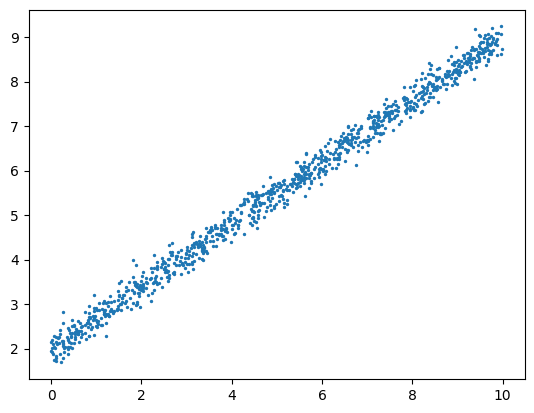

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

TOTAL_POINTS = 1000

x = tf.random.uniform(shape = [TOTAL_POINTS], minval=0, maxval=10)
noise = tf.random.normal(shape=[TOTAL_POINTS], stddev=0.2)

k_true = 0.7
b_true = 2.0

y = x*k_true + b_true + noise
plt.scatter(x,y, s=2)
plt.show()

In [9]:
k = tf.Variable(0.0)
b = tf.Variable(0.0)

EPOCHS = 50
learning_rate = 0.02

SGD

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.7069005>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.9846683>


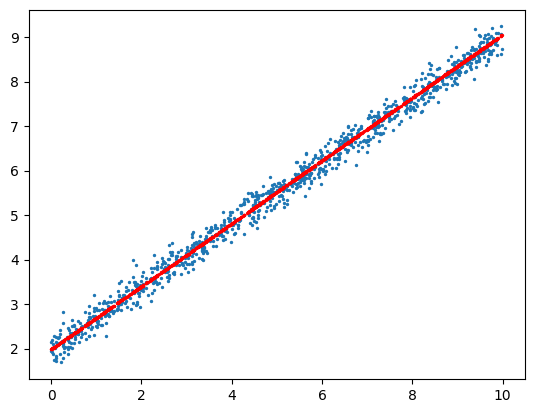

In [10]:
BATCH_SIZE = 100
num_steps = TOTAL_POINTS // BATCH_SIZE

for n in range(EPOCHS):
    for n_batch in range(num_steps):
        y_batch = y[n_batch * BATCH_SIZE : (n_batch+1)*BATCH_SIZE]
        x_batch = x[n_batch * BATCH_SIZE : (n_batch+1)*BATCH_SIZE]

        with tf.GradientTape() as t:
            f = k*x_batch + b
            loss = tf.reduce_mean(tf.square(y_batch-f))

        dk, db = t.gradient(loss, [k,b])
        k.assign_sub(learning_rate*dk)
        b.assign_sub(learning_rate*db)

print(k,b, sep='\n')

y_pr = k*x+b
plt.scatter(x, y, s=2)
plt.scatter(x, y_pr, c='r', s=2)
plt.show()
        



SGD через встроенную функцию

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.7046672>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.9999458>


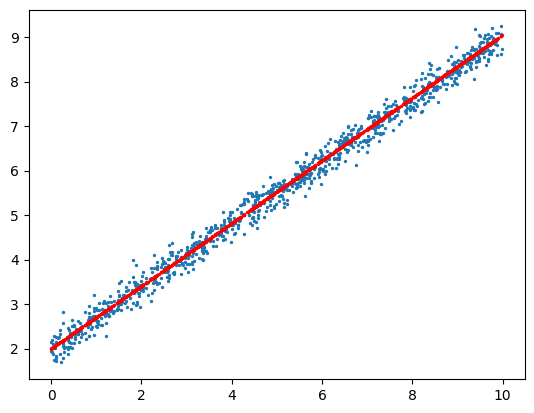

In [7]:
opt = tf.optimizers.SGD(learning_rate=0.02)
for n in range(EPOCHS):
    for n_batch in range(num_steps):
        y_batch = y[n_batch * BATCH_SIZE : (n_batch+1)*BATCH_SIZE]
        x_batch = x[n_batch * BATCH_SIZE : (n_batch+1)*BATCH_SIZE]

        with tf.GradientTape() as t:
            f = k*x_batch + b
            loss = tf.reduce_mean(tf.square(y_batch-f))

        dk, db = t.gradient(loss, [k,b])
        opt.apply_gradients(zip([dk,db], [k,b]))

print(k,b, sep='\n')

y_pr = k*x+b
plt.scatter(x, y, s=2)
plt.scatter(x, y_pr, c='r', s=2)
plt.show()

Метод импульсов

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.7038781>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.9989954>


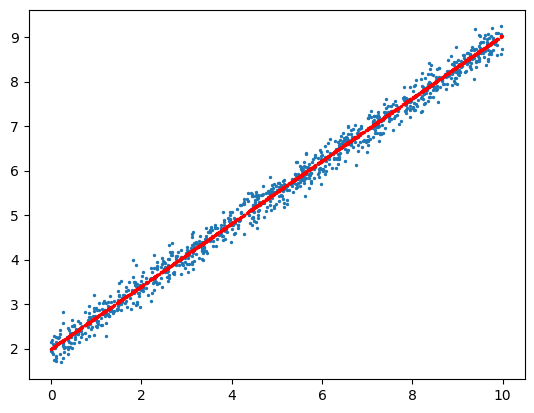

In [8]:
opt = tf.optimizers.SGD(momentum=0.5, learning_rate=0.02)
for n in range(EPOCHS):
    for n_batch in range(num_steps):
        y_batch = y[n_batch * BATCH_SIZE : (n_batch+1)*BATCH_SIZE]
        x_batch = x[n_batch * BATCH_SIZE : (n_batch+1)*BATCH_SIZE]

        with tf.GradientTape() as t:
            f = k*x_batch + b
            loss = tf.reduce_mean(tf.square(y_batch-f))

        dk, db = t.gradient(loss, [k,b])
        opt.apply_gradients(zip([dk,db], [k,b]))

print(k,b, sep='\n')

y_pr = k*x+b
plt.scatter(x, y, s=2)
plt.scatter(x, y_pr, c='r', s=2)
plt.show()

Импульс Нестерова

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.71359235>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.0014505>


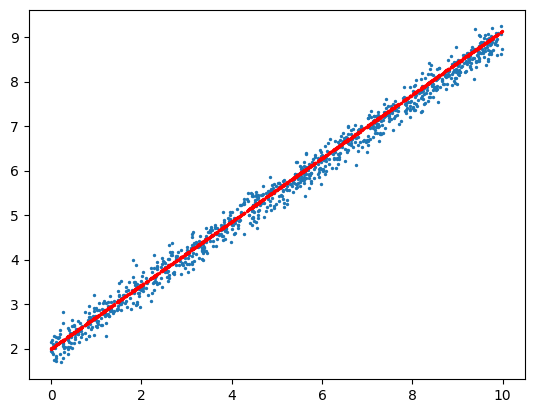

In [11]:
opt = tf.optimizers.SGD(momentum=0.5, nesterov=True, learning_rate=0.02)
for n in range(EPOCHS):
    for n_batch in range(num_steps):
        y_batch = y[n_batch * BATCH_SIZE : (n_batch+1)*BATCH_SIZE]
        x_batch = x[n_batch * BATCH_SIZE : (n_batch+1)*BATCH_SIZE]

        with tf.GradientTape() as t:
            f = k*x_batch + b
            loss = tf.reduce_mean(tf.square(y_batch-f))

        dk, db = t.gradient(loss, [k,b])
        opt.apply_gradients(zip([dk,db], [k,b]))

print(k,b, sep='\n')

y_pr = k*x+b
plt.scatter(x, y, s=2)
plt.scatter(x, y_pr, c='r', s=2)
plt.show()

Adagrad

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.7023471>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.0012434>


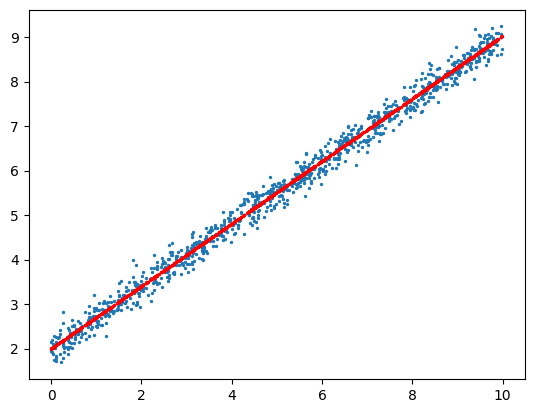

In [12]:
opt = tf.optimizers.Adagrad(learning_rate=0.2)
for n in range(EPOCHS):
    for n_batch in range(num_steps):
        y_batch = y[n_batch * BATCH_SIZE : (n_batch+1)*BATCH_SIZE]
        x_batch = x[n_batch * BATCH_SIZE : (n_batch+1)*BATCH_SIZE]

        with tf.GradientTape() as t:
            f = k*x_batch + b
            loss = tf.reduce_mean(tf.square(y_batch-f))

        dk, db = t.gradient(loss, [k,b])
        opt.apply_gradients(zip([dk,db], [k,b]))

print(k,b, sep='\n')

y_pr = k*x+b
plt.scatter(x, y, s=2)
plt.scatter(x, y_pr, c='r', s=2)
plt.show()

Adadelta

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.703507>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.0026226>


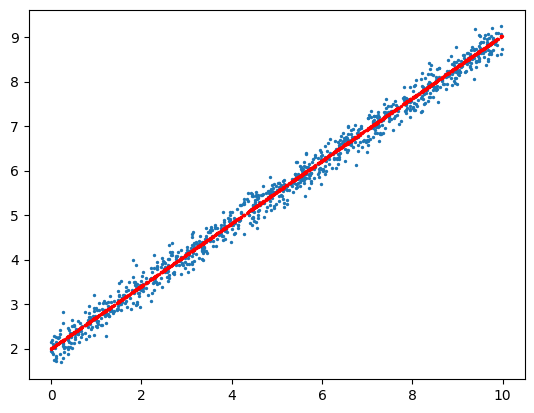

In [13]:
opt = tf.optimizers.Adadelta(learning_rate=4.0)
for n in range(EPOCHS):
    for n_batch in range(num_steps):
        y_batch = y[n_batch * BATCH_SIZE : (n_batch+1)*BATCH_SIZE]
        x_batch = x[n_batch * BATCH_SIZE : (n_batch+1)*BATCH_SIZE]

        with tf.GradientTape() as t:
            f = k*x_batch + b
            loss = tf.reduce_mean(tf.square(y_batch-f))

        dk, db = t.gradient(loss, [k,b])
        opt.apply_gradients(zip([dk,db], [k,b]))

print(k,b, sep='\n')

y_pr = k*x+b
plt.scatter(x, y, s=2)
plt.scatter(x, y_pr, c='r', s=2)
plt.show()

RMSProp

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.7062211>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.0045578>


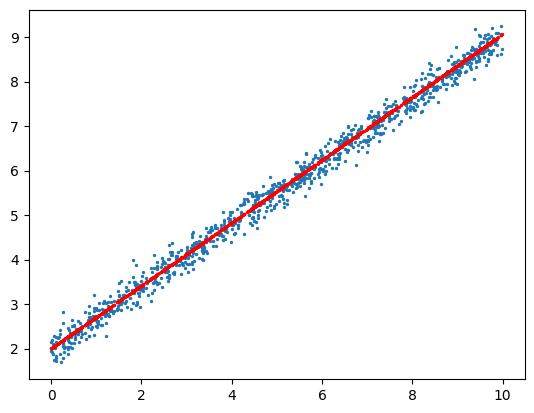

In [14]:
opt = tf.optimizers.RMSprop(learning_rate=0.01)
for n in range(EPOCHS):
    for n_batch in range(num_steps):
        y_batch = y[n_batch * BATCH_SIZE : (n_batch+1)*BATCH_SIZE]
        x_batch = x[n_batch * BATCH_SIZE : (n_batch+1)*BATCH_SIZE]

        with tf.GradientTape() as t:
            f = k*x_batch + b
            loss = tf.reduce_mean(tf.square(y_batch-f))

        dk, db = t.gradient(loss, [k,b])
        opt.apply_gradients(zip([dk,db], [k,b]))

print(k,b, sep='\n')

y_pr = k*x+b
plt.scatter(x, y, s=2)
plt.scatter(x, y_pr, c='r', s=2)
plt.show()

Adam

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.70584846>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.004823>


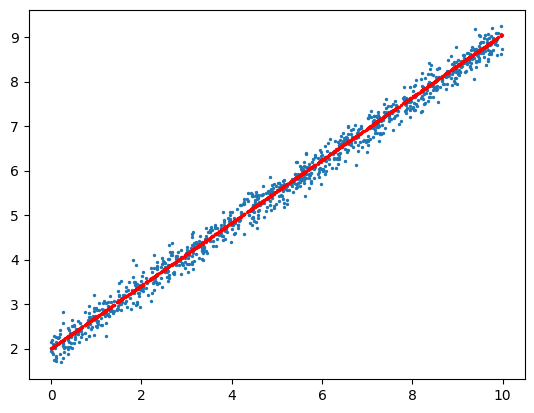

In [15]:
opt = tf.optimizers.Adam(learning_rate=0.1)
for n in range(EPOCHS):
    for n_batch in range(num_steps):
        y_batch = y[n_batch * BATCH_SIZE : (n_batch+1)*BATCH_SIZE]
        x_batch = x[n_batch * BATCH_SIZE : (n_batch+1)*BATCH_SIZE]

        with tf.GradientTape() as t:
            f = k*x_batch + b
            loss = tf.reduce_mean(tf.square(y_batch-f))

        dk, db = t.gradient(loss, [k,b])
        opt.apply_gradients(zip([dk,db], [k,b]))

print(k,b, sep='\n')

y_pr = k*x+b
plt.scatter(x, y, s=2)
plt.scatter(x, y_pr, c='r', s=2)
plt.show()